In [186]:
import torch
import torch.nn as nn
import pandas as pd
import math
import numpy as np
import einops
from torch.utils.data import TensorDataset, DataLoader
import statistics

In [187]:
x_train_original = pd.read_csv("Data/x_train.csv",index_col="ID")
x_test_original = pd.read_csv("Data/x_test.csv",index_col='ID')

In [62]:
x_test_original

,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,...,RET_16,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20
ID,,,,,,,,,,,,,,,,,,,,,
418595,2,0,37,12,5,94,0.020208,0.146176,0.010059,0.224756,...,0.022364,-0.301163,-0.001035,-0.416533,-0.000148,-0.004548,-0.000148,-0.161792,0.016997,-0.007221
418596,2,1,15,4,3,37,0.009134,-0.251631,0.021913,-0.712515,...,-0.002062,-0.679724,-0.001544,-0.408979,0.001546,0.396372,-0.007875,-0.431760,0.001742,-0.574228
418597,2,4,57,20,8,142,0.005008,-0.115845,0.005914,-0.107441,...,0.004458,-0.451590,0.011481,-0.536967,0.009520,-0.368585,0.000000,0.022713,-0.002066,-0.207362
418598,2,5,35,12,5,91,0.015370,-0.090295,-0.013738,0.048465,...,-0.010984,-0.039714,0.037018,0.665132,-0.003097,0.141991,-0.008191,-0.172382,0.005145,-0.353172
418599,2,6,57,20,8,142,0.011419,-0.289027,0.022807,-0.262690,...,0.001045,-0.565747,0.004304,-0.506291,-0.026469,-0.280666,0.010743,0.365773,-0.011134,0.933284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617019,222,5707,52,18,7,122,0.010188,-0.476830,-0.006419,-0.534137,...,-0.001028,-0.515748,0.019115,0.361119,-0.002090,-0.132224,0.015389,-0.014298,-0.008680,0.128657
617020,222,5710,33,10,4,83,-0.000838,-0.063269,-0.026928,0.532781,...,-0.007136,-0.203097,0.032965,0.108639,0.013488,-0.458271,0.019894,-0.353293,0.013513,-0.219671
617021,222,5714,49,17,7,113,0.005941,-0.506350,-0.016363,-0.173802,...,-0.016931,0.340198,0.002121,1.087437,-0.012910,1.791362,-0.057857,6.330687,-0.000493,1.175063


In [101]:

print(x_train_original.isnull().sum())

for i in range(1,6):
    temp = x_train_original[x_train_original.columns[i]].isnull().sum()
    print(temp)

# Stock 5716
# Industry 74
# Industry_group 26
# Sector 11
# Sub_industry 182

# feature dimension - 16, 8, 6, 4, 12

DATE                  0
STOCK                 0
INDUSTRY              0
INDUSTRY_GROUP        0
SECTOR                0
SUB_INDUSTRY          0
RET_1              2359
VOLUME_1          65025
RET_2              2465
VOLUME_2          66386
RET_3              2507
VOLUME_3          67819
RET_4              2544
VOLUME_4          70997
RET_5              2584
VOLUME_5          74693
RET_6              2597
VOLUME_6          74714
RET_7              2585
VOLUME_7          73853
RET_8              2623
VOLUME_8          73898
RET_9              2682
VOLUME_9          73298
RET_10             2692
VOLUME_10         73305
RET_11             2961
VOLUME_11         72025
RET_12             3186
VOLUME_12         62523
RET_13             3360
VOLUME_13         59008
RET_14             4413
VOLUME_14         60929
RET_15             4990
VOLUME_15         66373
RET_16             5280
VOLUME_16         67262
RET_17             5301
VOLUME_17         62314
RET_18             5307
VOLUME_18       

In [280]:
x_train_additional = x_train_original[x_train_original.columns[[0,2,3,4,5]]]
x_test_additional = x_test_original[x_test_original.columns[[0,2,3,4,5]]]
x_train_additional_np = x_train_additional.to_numpy()
x_test_additional_np = x_test_additional.to_numpy()
print(x_test_additional)
print(x_train_original[x_train_original.columns[[0,2,3,4,5]]])


        DATE  INDUSTRY  INDUSTRY_GROUP  SECTOR  SUB_INDUSTRY
ID                                                          
418595     2        37              12       5            94
418596     2        15               4       3            37
418597     2        57              20       8           142
418598     2        35              12       5            91
418599     2        57              20       8           142
...      ...       ...             ...     ...           ...
617019   222        52              18       7           122
617020   222        33              10       4            83
617021   222        49              17       7           113
617022   222        56              20       8           138
617023   222        50              17       7           114

[198429 rows x 5 columns]
        DATE  INDUSTRY  INDUSTRY_GROUP  SECTOR  SUB_INDUSTRY
ID                                                          
0          0        18               5       3            

In [122]:
x_train_original.describe()

,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,...,RET_16,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20
count,418595.000000,418595.000000,418595.000000,418595.000000,418595.000000,418595.000000,416236.000000,353570.000000,416130.000000,352209.000000,...,413315.000000,351333.000000,413294.000000,356281.000000,413288.000000,351009.000000,413282.000000,351266.000000,413254.000000,350738.000000
mean,108.659002,3373.567833,37.176020,12.697959,5.483845,90.391663,0.001383,-0.071502,0.000973,-0.075230,...,0.001074,-0.076018,0.001642,-0.087854,0.001131,-0.076147,-0.000798,-0.076496,-0.000027,-0.076337
std,61.891642,1533.157749,19.706505,7.231701,2.410113,47.491157,0.031311,3.038658,0.030987,2.635549,...,0.029538,2.185741,0.031914,2.094459,0.031435,2.423121,0.030738,2.229668,0.033347,2.721355
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.845324,-2.434414,-0.770751,-3.007262,...,-0.765478,-5.600056,-0.825014,-4.610393,-0.876157,-4.167784,-0.880000,-2.341887,-0.785714,-2.768928
25%,56.000000,2478.000000,22.000000,6.000000,4.000000,49.000000,-0.010970,-0.555394,-0.011312,-0.540629,...,-0.010527,-0.533574,-0.011331,-0.552613,-0.010949,-0.539491,-0.012139,-0.527846,-0.011682,-0.542790
50%,104.000000,3560.000000,43.000000,15.000000,6.000000,104.000000,0.000637,-0.282609,0.000401,-0.278437,...,0.000530,-0.272271,0.000433,-0.285480,0.000000,-0.281753,0.000000,-0.277674,0.000000,-0.283405
75%,161.000000,4606.000000,53.000000,19.000000,7.000000,128.000000,0.012950,0.047759,0.012326,0.041177,...,0.012084,0.029131,0.012862,0.027272,0.012180,0.027639,0.011236,0.030201,0.011712,0.035795
max,223.000000,5716.000000,74.000000,26.000000,11.000000,182.000000,1.444990,1232.174009,1.427746,632.268279,...,1.028902,355.613431,1.707736,408.771698,6.000004,788.461460,2.954430,631.249564,7.208859,932.939205


In [312]:
x_train_return = x_train_original[x_train_original.columns[6:16:2]]
x_train_volume = x_train_original[x_train_original.columns[7:17:2]]
x_test_return = x_test_original[x_test_original.columns[6:16:2]]
x_test_volume = x_test_original[x_test_original.columns[7:17:2]]

In [316]:
x_train_volume

,VOLUME_1,VOLUME_2,VOLUME_3,VOLUME_4,VOLUME_5
ID,,,,,
0,0.147931,0.179183,0.033832,-0.362868,-0.972920
1,NaN,NaN,NaN,NaN,NaN
2,-0.096282,0.084771,-0.298777,-0.157421,0.091455
3,-0.429540,-0.089919,-0.639737,-0.940163,-0.882464
4,-0.847155,-0.943033,-1.180629,-1.313896,-1.204398
...,...,...,...,...,...
418590,-0.217823,-0.125333,-0.674800,-0.150397,-0.026910
418591,-0.375251,-0.029437,3.189102,0.403533,-0.840418
418592,-0.978856,-1.026267,-0.724158,-0.784385,-0.701318


In [317]:
x_train_return_fillmean = x_train_return.fillna(x_train_return.mean())
x_train_volume_fillmean = x_train_volume.fillna(x_train_volume.mean())
x_test_return_fillmean = x_test_return.fillna(x_test_return.mean())
x_test_volume_fillmean = x_test_volume.fillna(x_test_volume.mean())

In [318]:
x_train_return_np = x_train_return_fillmean.to_numpy()
x_train_volume_np = x_train_volume_fillmean.to_numpy()
x_test_return_np = x_test_return_fillmean.to_numpy()
x_test_volume_np = x_test_volume_fillmean.to_numpy()

x_train_return_np = np.clip(x_train_return_np, -0.1, 0.1)
x_test_return_np = np.clip(x_test_return_np, -0.1, 0.1)
x_train_volume_np = np.clip(x_train_volume_np, -0.1, 0.1)
x_test_volume_np = np.clip(x_test_volume_np, -0.1, 0.1)
x_train_return_np = (x_train_return_np - x_train_return_np.mean())/(x_train_return_np.std())
x_test_return_np = (x_test_return_np - x_train_return_np.mean())/(x_train_return_np.std())
x_train_volume_np = (x_train_volume_np - x_train_volume_np.mean())/(x_train_volume_np.std())
x_test_volume_np = (x_test_volume_np - x_train_volume_np.mean())/(x_train_volume_np.std())

x_train_np = np.concatenate((x_train_return_np, x_train_volume_np, x_train_additional_np), axis=1)
x_test_np = np.concatenate((x_test_return_np, x_test_volume_np, x_test_additional_np), axis=1)
x_train_return_np[0]

array([-0.61850445, -0.60929181,  0.38969815, -0.57788863,  0.59767037])

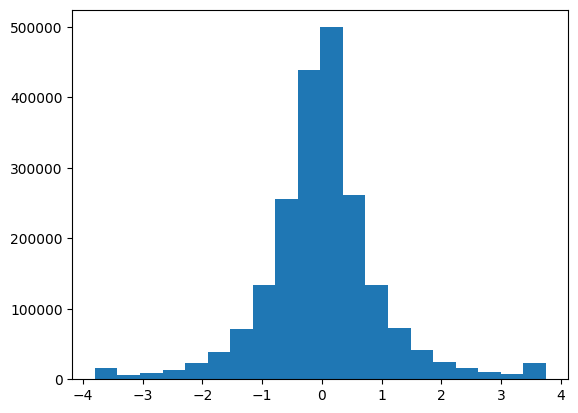

In [319]:
import matplotlib.pyplot as plt
x_train_volume_hist = einops.rearrange(x_train_return_np, " a b -> (a b)")

plt.hist(x_train_volume_hist, bins=20)
plt.show()

In [320]:
x_train_return_np

array([[-0.61850445, -0.60929181,  0.38969815, -0.57788863,  0.59767037],
       [ 0.12604177, -3.44212248,  0.68607681, -0.98797331, -1.46048059],
       [-0.00766971, -2.24658847, -0.3654797 ,  0.91345878,  0.32865147],
       ...,
       [ 0.80089718, -0.24800063,  0.39033643,  0.20324436, -0.62143363],
       [ 0.43785899,  0.38793223,  0.28045117,  0.53805875,  0.23046555],
       [ 2.8495127 , -0.06157142,  2.22781538,  1.03173804,  0.34482878]])

In [194]:
y_train = pd.read_csv("Data/y_train.csv")
y_train_np = y_train.to_numpy()[:,1]
#print(y_train_np)
y_train_mapped_np = np.array([1 if val else 0 for val in y_train_np])



In [195]:
test = pd.read_csv("Data/y_train.csv")
print(test[test.columns[1]])

0          True
1          True
2         False
3         False
4         False
          ...  
418590    False
418591    False
418592     True
418593     True
418594    False
Name: RET, Length: 418595, dtype: bool


In [321]:
x_train = torch.tensor(x_train_np).float()
x_test = torch.tensor(x_test_np).float()

In [322]:
y_train = torch.tensor(y_train_mapped_np).long()

print(y_train)

tensor([1, 1, 0,  ..., 1, 1, 0])


In [198]:
percentage_1 = y_train.eq(1).float().mean()*100
print(percentage_1)
print(100-percentage_1.item())

tensor(49.8921)
50.10786056518555


In [323]:
batch_size = 640
train_ds = TensorDataset(x_train,y_train)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [13]:

#train_dl = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)


In [360]:
class Embedding(nn.Module):
    def __init__(self):
        super().__init__()
        # Date 223
        # Industry 74
        # Industry_group 26
        # Sector 11
        # Sub_industry 182

        # feature dimension - 12, 8, 6, 4, 12
        '''
        self.stock_encodings = nn.Parameter(torch.rand(5717, 16, requires_grad=True))
        self.industry_encodings = nn.Parameter(torch.rand(75, 8, requires_grad=True))
        self.industry_group_encodings = nn.Parameter(torch.rand(27, 6, requires_grad=True))
        self.sector_encodings = nn.Parameter(torch.rand(12, 4, requires_grad=True))
        self.sub_industry_encodings = nn.Parameter(torch.rand(183, 12, requires_grad=True))
        '''
        self.date_encodings = nn.Embedding(224,8)
        self.industry_encodings = nn.Embedding(75,4)
        self.industry_group_encodings = nn.Embedding(27,4)
        self.sector_encodings = nn.Embedding(12,3)
        self.sub_industry_encodings = nn.Embedding(183,8)

    def forward(self,input):
        #print(input)
        date_encoding = self.date_encodings(input[:,0].long())
        industry_encoding = self.industry_encodings(input[:,1].long())
        industry_group_encoding = self.industry_group_encodings(input[:,2].long())
        sector_encoding = self.sector_encodings(input[:,3].long())
        sub_industry_encoding = self.sub_industry_encodings(input[:,4].long())
        return torch.cat((date_encoding,industry_encoding,industry_group_encoding,sector_encoding,sub_industry_encoding), dim=1)


class DenseNetwork(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.input_dim = input_dim
        self.embedding = Embedding()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Linear(32,2)
        )

    def forward(self, input):
        #print("input[-5:]", input[:,-5:].long())
        embedding = self.embedding(input[:,-5:].long())
        full_vec = torch.cat((input[:,:-5],embedding), dim=1)
        output = self.layers(full_vec)
        return output


In [361]:
model = DenseNetwork(37)
optimiser = torch.optim.Adam(model.parameters(), lr=0.001)

In [362]:
criterion = nn.CrossEntropyLoss()

In [372]:
epochs = 5
epoch = 0

while epoch < epochs:
    accuracies = []
    for i, batch in enumerate(train_dl):
        data, label = batch
        #print("data", data.size())
        #print("label", label.size())
        output = model(data)
        #print("output", output.size())
        loss = criterion(output, label)
        model.zero_grad()
        loss.backward()
        optimiser.step()

        argmax = torch.argmax(output, dim=1)
        accuracy = argmax.eq(label).float().mean()*100
        accuracies.append(accuracy.item())
        
        if i*batch_size % 6400 == 0:
            print(f"epoch: {epoch}, loss: {loss}, acc: {accuracy}")

    
    print(f"Epoch: {epoch}, average accuracy: {statistics.mean(accuracies)}")
    epoch += 1
    

epoch: 0, loss: 0.6627904176712036, acc: 59.84375
epoch: 0, loss: 0.6616555452346802, acc: 59.84375
epoch: 0, loss: 0.6519640684127808, acc: 61.874996185302734
epoch: 0, loss: 0.6693950891494751, acc: 58.59375
epoch: 0, loss: 0.6606839299201965, acc: 60.9375
epoch: 0, loss: 0.6653046607971191, acc: 56.71875
epoch: 0, loss: 0.659122109413147, acc: 58.28125
epoch: 0, loss: 0.673193097114563, acc: 59.531246185302734
epoch: 0, loss: 0.6689351797103882, acc: 59.6875
epoch: 0, loss: 0.6569609045982361, acc: 62.1875
epoch: 0, loss: 0.6715775728225708, acc: 56.093753814697266
epoch: 0, loss: 0.6916635036468506, acc: 54.843746185302734
epoch: 0, loss: 0.6586211919784546, acc: 60.46875
epoch: 0, loss: 0.6779392957687378, acc: 55.46875
epoch: 0, loss: 0.671282172203064, acc: 57.03125
epoch: 0, loss: 0.6636433005332947, acc: 60.15625
epoch: 0, loss: 0.6741583943367004, acc: 57.8125
epoch: 0, loss: 0.6745782494544983, acc: 58.437503814697266
epoch: 0, loss: 0.662056565284729, acc: 58.28125
epoch: 0

In [369]:
with torch.no_grad():
    output = model(x_test)

In [370]:
output_argmax = torch.argmax(output, dim=1)

In [371]:
print(output_argmax)
output_tf = [True if val == 1 else False for val in output_argmax]
#print(output_tf)
output_df = pd.DataFrame(output_tf)
print(output_df)
output_df = output_df.squeeze()
output_df.index = x_test_original.index
output_df.name = 'RET'
print(x_test_original.index)
submission = pd.Series(output_tf)
submission.index = x_test_original.index
submission.name = "RET"
submission.to_csv("output.csv", index=True, header=True)


tensor([1, 1, 1,  ..., 1, 1, 1])
            0
0        True
1        True
2        True
3        True
4        True
...       ...
198424  False
198425   True
198426   True
198427   True
198428   True

[198429 rows x 1 columns]
Int64Index([418595, 418596, 418597, 418598, 418599, 418600, 418601, 418602,
            418603, 418604,
            ...
            617014, 617015, 617016, 617017, 617018, 617019, 617020, 617021,
            617022, 617023],
           dtype='int64', name='ID', length=198429)


In [367]:
torch.save(model, "best.pt")